<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/titanic_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!rm -f data/*
!wget -nv -P data https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv
!ls -al data
!wc -l data/*.csv

2025-03-28 00:52:28 URL:https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv [61194/61194] -> "data/titanic.csv" [1]
total 68
drwxr-xr-x 2 root root  4096 Mar 28 00:52 .
drwxr-xr-x 1 root root  4096 Mar 28 00:52 ..
-rw-r--r-- 1 root root 61194 Mar 28 00:52 titanic.csv
892 data/titanic.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocess Data

See data dictionary in [https://www.kaggle.com/code/jamesleslie/titanic-neural-network-for-beginners/input]

In [4]:
df = pd.read_csv('./data/titanic.csv') #, index_col='PassengerId')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## drop columns

drop columns that are unique per record.

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

## deal with NaN fields

In [6]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [8]:
# Cabin has too many NaN records, drop it
df = df.drop(['Cabin'], axis=1)

In [12]:
# use median age for missing Age
df['Age'] = df['Age'].fillna( df['Age'].median() )
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [13]:
# for the unknow embarked port, put U for unknown
df['Embarked'] = df['Embarked'].fillna('U')
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## categorise data

        Survival Count  Mortality Count  Survaval Ratio %
Pclass                                                   
1                  136               80         62.962963
2                   87               97         47.282609
3                  119              372         24.236253


<Figure size 300x200 with 0 Axes>

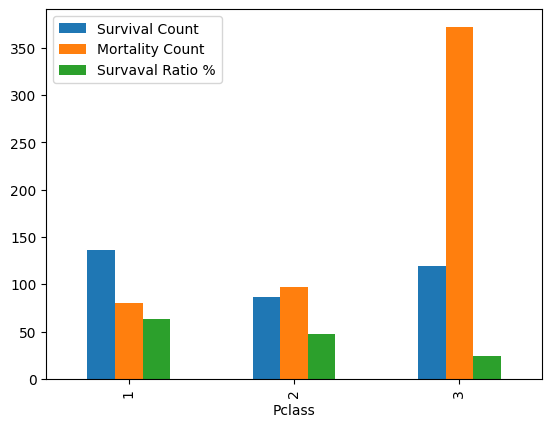

In [41]:
# Pclass

# calculate survival rate of each pclass:
pclass_survival_count = df.query('Survived == 1')['Pclass'].value_counts().sort_index()
pclass_mortal_count = df.query('Survived == 0')['Pclass'].value_counts().sort_index()
pclass_survival_ratio = pclass_survival_count / (pclass_survival_count + pclass_mortal_count) * 100

pclass_stats = pd.concat([pclass_survival_count, pclass_mortal_count, pclass_survival_ratio],
                         keys=['Survival Count', 'Mortality Count', 'Survaval Ratio %'], axis=1)
print(pclass_stats)

plt.figure(figsize=(3,2))
pclass_stats.plot(kind='bar')
plt.show()

By the look of the above, there seems to have some ordinality of Pclass on survival rate. So leave it as is.

In [48]:
# Sex only has 2 values, so turn them into 0 or 1
df['Sex'] = df['Sex'].astype('category').cat.codes
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [49]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked']

for var in categorical:
  df = pd.concat([df,
                  pd.get_dummies(df[var], prefix=var)], axis=1)
  del df[var]

In [50]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,7.2500,False,False,True,False
1,1,1,0,38.0,1,0,71.2833,True,False,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True,False
3,1,1,0,35.0,1,0,53.1000,False,False,True,False
4,0,3,1,35.0,0,0,8.0500,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True,False
887,1,1,0,19.0,0,0,30.0000,False,False,True,False
888,0,3,0,28.0,1,2,23.4500,False,False,True,False
889,1,1,1,26.0,0,0,30.0000,True,False,False,False


## scale continous columns

In [58]:
## scale continuous columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cont = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for c in cont:
  df[c] = df[c].astype('float64')
  df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

In [59]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,-0.0,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377
Sex,891.0,NaN,NaN,NaN,0.647587,0.47799,0.0,0.0,1.0,1.0,1.0
Age,891.0,NaN,NaN,NaN,0.0,1.000562,-2.224156,-0.565736,-0.104637,0.433312,3.891554
SibSp,891.0,NaN,NaN,NaN,0.0,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,NaN,NaN,NaN,0.0,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Fare,891.0,NaN,NaN,NaN,0.0,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
Embarked_C,891,2,False,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked_Q,891,2,False,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked_S,891,2,True,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
